In [ ]:
#Read in the various slices from the original tracks.csv dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
slice1 = pd.read_csv('/content/drive/MyDrive/CSCI_183_HW/tracks_modified.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
slice1.head()
slice1.shape

(20000, 25)

In [ ]:
slice2 = pd.read_csv('/content/drive/MyDrive/CSCI_183_HW/tracks_modified3.csv', nrows = 20000)
slice2.head()
slice2.shape

(20000, 25)

In [ ]:
slice3 = pd.read_csv('/content/drive/MyDrive/CSCI_183_HW/finalslice.csv')
slice3.shape

(5000, 25)

In [ ]:
slice4 = pd.read_csv('/content/drive/MyDrive/CSCI_183_HW/slice4.csv')
slice4.shape

(5000, 25)

In [ ]:
#Each slices 1 and 2 are datasets of 20,000 tracks from the larger tracks.csv file from Kaggle. Slice 3 and 4 are  smaller 5000 track subsets of tracks.csv.
#We will recombine them using pandas .concat to create a dataset of 50,000 tracks total and then filter the tracks by genre.
dataset = pd.concat([slice1, slice2, slice3,slice4], axis = 0)
dataset.to_csv('tracks_final.csv')
dataset.head()

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artist,id_artists,release_date,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist_id,genre,artist popularity,artist followers
0,0,5kG1ARHk8dli0bKiMN2oE6,Cupid - Deluxe Edition Version,61,228853,0,['Amy Winehouse'],['6Q192DXotxtaysaqNPy5yR'],2006,0.641,...,0.1630,0.000,0.0811,0.6960,87.181,4,6Q192DXotxtaysaqNPy5yR,"['british soul', 'indie r&b', 'neo soul']",73,7873545
1,1,6vCrhHr8Pdrimz5g81m0r1,Dream Lover - 2006 Remaster,0,151253,0,['Bobby Darin'],['0EodhzA6yW1bIdD5B4tcmJ'],2020-12-25,0.526,...,0.7000,0.000,0.4380,0.7220,131.850,4,0EodhzA6yW1bIdD5B4tcmJ,"['adult standards', 'brill building pop', 'eas...",60,446638
2,2,5YQPOIAt3U7DMAswTVvzax,Eu Sei,61,232120,0,['Papas Da Língua'],['5q4N33QzlyTfRRNq4T1gH9'],2006-01-01,0.440,...,0.5900,0.000,0.9350,0.3970,108.087,4,5q4N33QzlyTfRRNq4T1gH9,"['brazilian reggae', 'brazilian rock', 'mpb', ...",51,444067
3,3,2ucCA1HGBuROa22HHdu3Dw,Exit - 2006 Remaster,0,75747,0,['Man'],['6XNNAZyTxhw3IRa0xyRBeo'],2006-06-26,0.307,...,0.0153,0.884,0.2350,0.0735,179.381,3,6XNNAZyTxhw3IRa0xyRBeo,['progressive rock'],17,9059
4,4,4yLSpYlcO0jPPLTa3nW8zN,Fly,61,278933,0,['Ludovico Einaudi'],['2uFUBdaVGtyMqckSeCl0Qj'],2006-10-23,0.174,...,0.9940,0.861,0.0737,0.0347,167.972,3,2uFUBdaVGtyMqckSeCl0Qj,"['bow pop', 'compositional ambient', 'neo-clas...",77,2731716


In [ ]:
dataset.shape

(50000, 25)

In [ ]:
#Remove all rows that are not are not of hip/hop rap genre using regular expressions here
import re
rap_or_not = []
#we will append 1 to this list if the song falls under rap and its subgenres. Otherwise we will append 0.
for genre_list in dataset['genre']:
  if len(genre_list) > 2:
    match = re.search('\w*\s*rap\s*\w*|\w*\s*trap\s*\w*|\w*\s*hip\s+hop\s*\w*', genre_list)
    if match != None:
      rap_or_not.append(1)
    else:
      rap_or_not.append(0)
  else:
    rap_or_not.append(0)

#Add a new column to the dataset dataframe which holds whether or not a song is rap/hip hop. If the value in this column is 1, we have a hip hop/rap track
dataset['rap or not'] = rap_or_not

In [ ]:
#Restrict the dataset to strictly the rap genre
dataset_restricted = dataset.loc[dataset['rap or not'] == 1]
dataset_restricted.shape

(5116, 26)

In [ ]:
count_popular = 0
count_notpopular = 0
for item in dataset_restricted['popularity']:
  if item >= 55:
    count_popular+=1
  else:
    count_notpopular+=1
print(count_popular)
print(count_notpopular)

3608
1508


In [ ]:
#Confirm that dataset restricted only has rap tracks
dataset_restricted.head(100)

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artist,id_artists,release_date,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,primary_artist_id,genre,artist popularity,artist followers,rap or not
8,8,2TgPHDU8zPgAvkSLXkHKXR,Vato,61,284653,1,"['Snoop Dogg', 'B-Real']","['7hJcb9fa4alzcOq3EaNPoG', '5NSTw9av5T8orAD9dz...",2006-01-01,0.4840,...,0.00000,0.3780,0.4600,90.961,4,7hJcb9fa4alzcOq3EaNPoG,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",81,8291201,1
58,58,5wKl29ZzdUa3e2M9cMa3hp,White Light Meditation (2006),0,1472935,0,"['Didge Therapy', 'Joseph B. Carringer']","['1MpHJnRtu4as0YVIFeIsrE', '5LZOUwC2gi98iy580Z...",2015-09-15,0.0895,...,0.84200,0.1120,0.1860,85.786,4,1MpHJnRtu4as0YVIFeIsrE,['therapy'],6,375,1
63,63,3rMyMv8EjKXoPnaRo2hdJN,Stuntin' Like My Daddy - Street,60,267293,1,"['Birdman', 'Lil Wayne']","['35sCXuy5gN6Or69rZ9vqBs', '55Aa2cqylxrFIXC767...",2006-01-01,0.7100,...,0.00000,0.1620,0.8090,160.011,4,35sCXuy5gN6Or69rZ9vqBs,"['dirty south rap', 'gangster rap', 'hip hop',...",64,1032932,1
73,73,0nKZeSrqH9u31NLoTUsYBR,You Don't Know,60,257907,1,"['Eminem', '50 Cent', 'Ca$his', 'Lloyd Banks']","['7dGJo4pcD2V6oG8kP0tJRR', '3q7HBObVc0L8jNeTe5...",2006-12-04,0.7670,...,0.00000,0.0957,0.7470,85.475,4,7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']",89,56025289,1
95,95,23hbqaze4DcmXchvsqIB5Q,Cupid's Chokehold / Breakfast in America - Rad...,60,237173,0,['Gym Class Heroes'],['4IJczjB0fJ04gs4uvP0Fli'],2006-07-25,0.5840,...,0.00000,0.2890,0.8210,79.702,4,4IJczjB0fJ04gs4uvP0Fli,"['dance pop', 'pop rap']",69,1371488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,917,3sfydNh0QQAdnIAtDVG16H,Like This (feat. Eve),60,215853,0,"['Kelly Rowland', 'Eve']","['3AuMNF8rQAKOzjYppFNAoB', '64V0qcIldpWvtvY7re...",2007-06-22,0.6760,...,0.00000,0.0627,0.4890,178.117,4,3AuMNF8rQAKOzjYppFNAoB,"['atl hip hop', 'dance pop', 'hip pop', 'neo s...",66,3101108,1
949,949,795LIYKphBOsvyMh5hZaPk,The Glory,60,212707,1,['Kanye West'],['5K4W6rqBFWDnAN6FQUkS6x'],2007-09-11,0.4230,...,0.00000,0.1720,0.7080,84.336,4,5K4W6rqBFWDnAN6FQUkS6x,"['chicago rap', 'rap']",90,17370358,1
958,958,6joiQ57IEXiC0yWtpZ71e5,I'll Still Kill,60,223507,1,"['50 Cent', 'Akon']","['3q7HBObVc0L8jNeTe5Gofh', '0z4gvV4rjIZ9wHck67...",2007-01-01,0.6660,...,0.00001,0.2300,0.7250,88.046,4,3q7HBObVc0L8jNeTe5Gofh,"['east coast hip hop', 'gangster rap', 'hip ho...",81,8974515,1
963,963,0hV0Sfwl3MInpYHCZowASi,Riding the Waves of Reiki (2007),0,1660750,0,"['Didge Therapy', 'Joseph B. Carringer']","['1MpHJnRtu4as0YVIFeIsrE', '5LZOUwC2gi98iy580Z...",2015-09-15,0.1390,...,0.84600,0.3810,0.0365,101.698,3,1MpHJnRtu4as0YVIFeIsrE,['therapy'],6,375,1


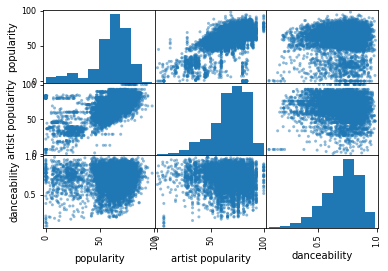

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
features = ['popularity','artist popularity','danceability']
scatter_matrix(dataset_restricted[features])
plt.show()

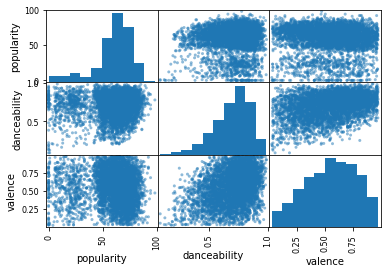

In [ ]:
features2 = ['popularity','danceability','valence']
scatter_matrix(dataset_restricted[features2])
plt.show()

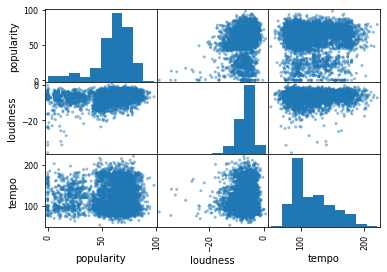

In [ ]:
features3 = ['popularity','loudness','tempo']
scatter_matrix(dataset_restricted[features3])
plt.show()

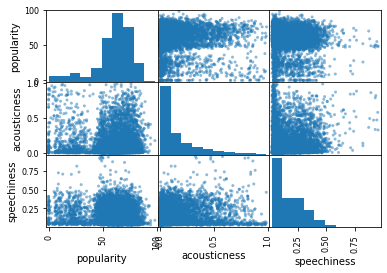

In [ ]:
features4 = ['popularity','acousticness','speechiness']
scatter_matrix(dataset_restricted[features4])
plt.show()

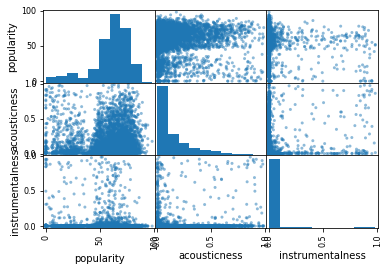

In [ ]:
features5 = ['popularity','acousticness','instrumentalness']
scatter_matrix(dataset_restricted[features5])
plt.show()

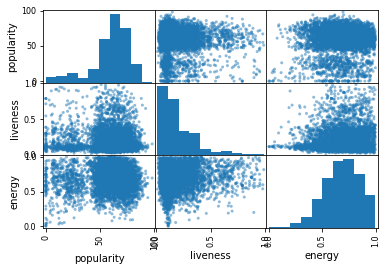

In [ ]:
features6 = ['popularity','liveness','energy']
scatter_matrix(dataset_restricted[features6])
plt.show()

In [ ]:
#Visualize the correlation between various features
dataset_restricted.corr()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist popularity,artist followers,rap or not
Unnamed: 0,1.000000,0.171025,-0.063161,0.105331,0.015717,0.035382,-0.020342,0.147352,-0.009575,0.005503,0.036670,-0.013196,-0.032912,-0.005434,-0.038183,-0.018541,0.216801,0.038121,NaN
popularity,0.171025,1.000000,-0.093624,0.242368,0.034511,0.032248,-0.012514,0.255047,-0.010616,-0.093930,-0.011778,-0.124817,-0.056241,-0.048231,0.027802,-0.000650,0.614805,0.279928,NaN
duration_ms,-0.063161,-0.093624,1.000000,-0.025285,-0.111175,-0.057024,-0.013276,-0.179747,0.005964,-0.016837,0.024407,0.168109,0.044689,-0.062085,-0.064628,-0.011243,-0.105367,-0.010373,NaN
explicit,0.105331,0.242368,-0.025285,1.000000,0.111757,-0.081328,0.011901,0.064025,0.023279,0.303174,-0.008902,-0.114069,0.044749,-0.119876,-0.012167,0.010328,0.260011,0.145300,NaN
danceability,0.015717,0.034511,-0.111175,0.111757,1.000000,-0.204121,0.023021,-0.049831,-0.036623,0.118394,-0.045441,-0.163040,-0.117579,0.342492,-0.145024,0.077588,-0.046959,-0.035135,NaN
energy,0.035382,0.032248,-0.057024,-0.081328,-0.204121,1.000000,0.019234,0.648043,0.010450,-0.095112,-0.403016,-0.082890,0.137693,0.212010,0.067162,0.052868,0.082974,-0.001515,NaN
key,-0.020342,-0.012514,-0.013276,0.011901,0.023021,0.019234,1.000000,-0.000996,-0.215105,0.050346,-0.003206,-0.018977,0.008320,0.086886,-0.003728,-0.009922,0.002165,0.003720,NaN
loudness,0.147352,0.255047,-0.179747,0.064025,-0.049831,0.648043,-0.000996,1.000000,-0.013609,-0.137975,-0.287893,-0.229603,0.023533,0.075862,0.053439,0.043370,0.326777,0.182200,NaN
mode,-0.009575,-0.010616,0.005964,0.023279,-0.036623,0.010450,-0.215105,-0.013609,1.000000,0.003449,-0.021731,0.008402,0.023347,-0.037567,0.017371,0.009591,-0.024617,-0.023810,NaN
speechiness,0.005503,-0.093930,-0.016837,0.303174,0.118394,-0.095112,0.050346,-0.137975,0.003449,1.000000,0.082715,-0.140804,0.101388,0.083774,0.041850,0.032307,-0.040215,-0.025353,NaN


In [ ]:
#Now begin classification task to classify
#Create popularity threshold of 55. 
#Everything with a popularity score exceeding 55 will be considered popular
#while everything below will be considered unpopular
new_popularity = []
for item in dataset_restricted['popularity']:
  if item > 55:
    new_popularity.append(1)
  else:
    new_popularity.append(0)
dataset_restricted['popularity'] = new_popularity
dataset_restricted.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,id,name,popularity,duration_ms,explicit,artist,id_artists,release_date,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,primary_artist_id,genre,artist popularity,artist followers,rap or not
8,8,2TgPHDU8zPgAvkSLXkHKXR,Vato,1,284653,1,"['Snoop Dogg', 'B-Real']","['7hJcb9fa4alzcOq3EaNPoG', '5NSTw9av5T8orAD9dz...",2006-01-01,0.4840,...,0.000,0.3780,0.460,90.961,4,7hJcb9fa4alzcOq3EaNPoG,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",81,8291201,1
58,58,5wKl29ZzdUa3e2M9cMa3hp,White Light Meditation (2006),0,1472935,0,"['Didge Therapy', 'Joseph B. Carringer']","['1MpHJnRtu4as0YVIFeIsrE', '5LZOUwC2gi98iy580Z...",2015-09-15,0.0895,...,0.842,0.1120,0.186,85.786,4,1MpHJnRtu4as0YVIFeIsrE,['therapy'],6,375,1
63,63,3rMyMv8EjKXoPnaRo2hdJN,Stuntin' Like My Daddy - Street,1,267293,1,"['Birdman', 'Lil Wayne']","['35sCXuy5gN6Or69rZ9vqBs', '55Aa2cqylxrFIXC767...",2006-01-01,0.7100,...,0.000,0.1620,0.809,160.011,4,35sCXuy5gN6Or69rZ9vqBs,"['dirty south rap', 'gangster rap', 'hip hop',...",64,1032932,1
73,73,0nKZeSrqH9u31NLoTUsYBR,You Don't Know,1,257907,1,"['Eminem', '50 Cent', 'Ca$his', 'Lloyd Banks']","['7dGJo4pcD2V6oG8kP0tJRR', '3q7HBObVc0L8jNeTe5...",2006-12-04,0.7670,...,0.000,0.0957,0.747,85.475,4,7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']",89,56025289,1
95,95,23hbqaze4DcmXchvsqIB5Q,Cupid's Chokehold / Breakfast in America - Rad...,1,237173,0,['Gym Class Heroes'],['4IJczjB0fJ04gs4uvP0Fli'],2006-07-25,0.5840,...,0.000,0.2890,0.821,79.702,4,4IJczjB0fJ04gs4uvP0Fli,"['dance pop', 'pop rap']",69,1371488,1


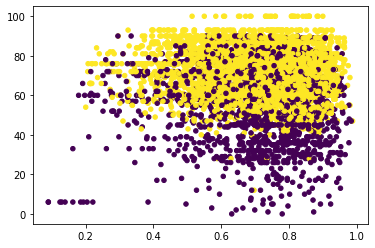

In [ ]:
#Begin creating 3D scatter plots to visualize the relationship
#between pairs of features and popularity of the song.
#We are looking for linearly seperable data to determine which
#features might be helpful in our classification task.
import matplotlib.pyplot as plt
x = dataset_restricted['danceability']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

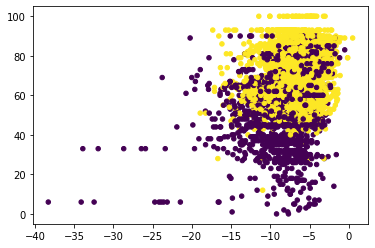

In [ ]:
x = dataset_restricted['loudness']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

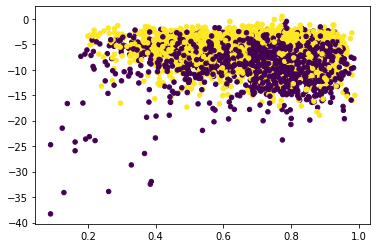

In [ ]:
x = dataset_restricted['danceability']
y = dataset_restricted['loudness']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

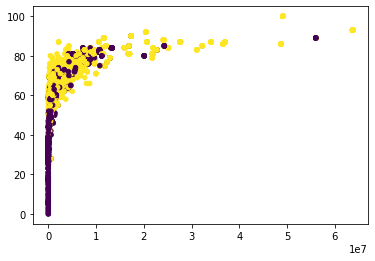

In [ ]:
x = dataset_restricted['artist followers']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

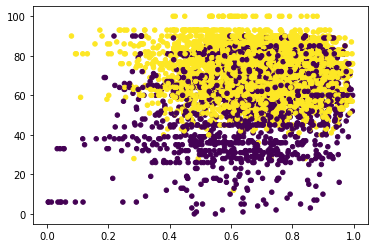

In [ ]:
x = dataset_restricted['energy']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

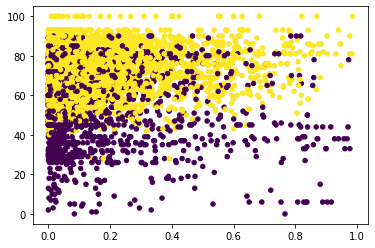

In [ ]:
x = dataset_restricted['acousticness']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']

plt.scatter(x,y, s = 20, c=colors)

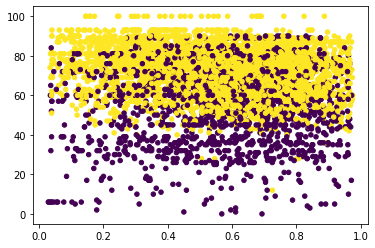

In [ ]:
x = dataset_restricted['valence']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']
plt.scatter(x,y, s = 20, c=colors)

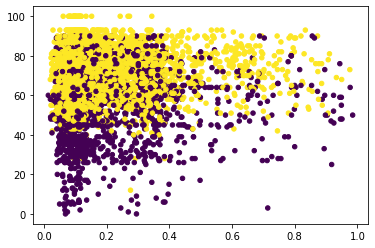

In [ ]:
x = dataset_restricted['liveness']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']
plt.scatter(x,y, s = 20, c=colors)

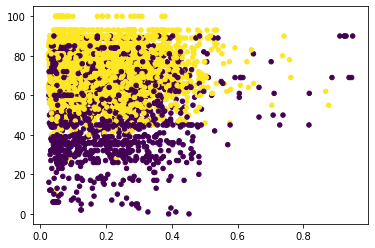

In [ ]:
x = dataset_restricted['speechiness']
y = dataset_restricted['artist popularity']
colors = dataset_restricted['popularity']
plt.scatter(x,y, s = 20, c=colors)


In [ ]:
#Build multiple classifiers for song popularity on this rap/hip hop dataset and see how each performs. We will start with binary classification using 
#logistic regression than see how other algorithms such as SVM and KNN perform

In [ ]:
#Import sklearn functions we will use to perform logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#Create a table that will hold the features we use for our various logistic regressions to predict having a high chance  
c_names = ['Features', 'Precision', 'Recall', 'Accuracy', 'F1-Score']
results = pd.DataFrame(columns = c_names)
results
features = []
precision = []
recall = []
accuracy = []
f1 = []

#These lifts hold the optimal models and their evaluation scores
# (dataframe will be displayed in the end of this jupyter notebook)
o_features = []
o_precision = []
o_recall = []
o_accuracy = []
o_f1 = []

In [ ]:
#Start with logistic regressions with train_test split of 0.3
y = dataset_restricted['popularity']
column_names = ['artist popularity', 'danceability']
features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist popularity'] = dataset_restricted['artist popularity']
X['danceability'] = dataset_restricted['danceability']
X.head(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy.append(accuracy_score(y_pred, y_test))
precision.append(precision_score(y_pred, y_test))
recall.append(recall_score(y_pred, y_test))
f1.append(f1_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.864935064935065
[[224  75]
 [237 999]]


In [ ]:
y = dataset_restricted['popularity']
column_names = ['artist followers', 'danceability']
features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist followers'] = dataset_restricted['artist followers']
X['danceability'] = dataset_restricted['danceability']
X.head(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


accuracy.append(accuracy_score(y_pred, y_test))
precision.append(precision_score(y_pred, y_test))
recall.append(recall_score(y_pred, y_test))
f1.append(f1_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8233039478727482
[[   0    0]
 [ 461 1074]]


In [ ]:
y = dataset_restricted['popularity']
column_names = ['artist popularity','loudness','energy','speechiness','danceability']
features.append(column_names)
o_features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist popularity'] = dataset_restricted['artist popularity']
X['loudness'] = dataset_restricted['loudness']
X['energy'] = dataset_restricted['energy']
X['speechiness'] = dataset_restricted['speechiness']
X['danceability'] = dataset_restricted['danceability']
X.head(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy.append(accuracy_score(y_pred, y_test))
precision.append(precision_score(y_pred, y_test))
recall.append(recall_score(y_pred, y_test))
f1.append(f1_score(y_pred, y_test))
o_accuracy.append(accuracy_score(y_pred, y_test))
o_precision.append(precision_score(y_pred, y_test))
o_recall.append(recall_score(y_pred, y_test))
o_f1.append(f1_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8711819389110226
[[260  90]
 [201 984]]


In [ ]:
y = dataset_restricted['popularity']
column_names = ['danceability','loudness', 'energy','tempo']
features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['danceability'] = dataset_restricted['danceability']
X['loudness'] = dataset_restricted['loudness']
X['energy'] = dataset_restricted['energy']
X['tempo'] = dataset_restricted['tempo']

X.head(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(y_pred)

accuracy.append(accuracy_score(y_pred, y_test))
precision.append(precision_score(y_pred, y_test))
recall.append(recall_score(y_pred, y_test))
f1.append(f1_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

[1 0 0 ... 1 0 1]
0.8295122967903295
[[131  79]
 [330 995]]


In [ ]:
y = dataset_restricted['popularity']
column_names = ['loudness', 'valence','danceability','speechiness','energy']
features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['danceability'] = dataset_restricted['danceability']
X['loudness'] = dataset_restricted['loudness']
X['energy'] = dataset_restricted['energy']
X['speechiness'] = dataset_restricted['speechiness']
X['valence'] = dataset_restricted['valence']

X.head(20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy.append(accuracy_score(y_pred, y_test))
precision.append(precision_score(y_pred, y_test))
recall.append(recall_score(y_pred, y_test))
f1.append(f1_score(y_pred, y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8334728033472804
[[141  78]
 [320 996]]


In [ ]:
#Create a logistic_regressions dataframe which highlights the different features used
#in the various classifiers and their evaluation scores.
logistic_regressions = pd.DataFrame(columns = c_names)
logistic_regressions['Features'] = features
logistic_regressions['Precision'] = precision
logistic_regressions['Recall'] = recall
logistic_regressions['Accuracy'] = accuracy
logistic_regressions['F1-Score'] = f1

In [ ]:
logistic_regressions.head(10)
logistic_regressions.sort_values(by = 'F1-Score', ascending = False)

,Features,Precision,Recall,Accuracy,F1-Score
2,"[artist popularity, loudness, energy, speechin...",0.916201,0.830380,0.810423,0.871182
0,"[artist popularity, danceability]",0.930168,0.808252,0.796743,0.864935
4,"[loudness, valence, danceability, speechiness,...",0.927374,0.756839,0.740717,0.833473
3,"[danceability, loudness, energy, tempo]",0.926443,0.750943,0.733550,0.829512
1,"[artist followers, danceability]",1.000000,0.699674,0.699674,0.823304


In [ ]:
#New dataframe will display the performance scores for the best model
#I built with each of the following Machine Learning algorithms
col = ['Algorithm', 'Features', 'Precision', 'Recall', 'Accuracy', 'F1-Score']
algorithms = ['Logistic Regression','SVM (linear)', 'SVM (Polynomial)', 'K-Nearest Neighbor']
final_results = pd.DataFrame(columns = col)
final_results['Algorithm'] = algorithms

In [ ]:
#Build models using support vector machine algorithm  (linear kernel)
from sklearn import svm
y = dataset_restricted['popularity']
column_names = ['artist popularity', 'danceability', 'energy', 'loudness']
o_features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist popularity'] = dataset_restricted['artist popularity']
X['danceability'] = dataset_restricted['danceability']
X['energy'] = dataset_restricted['energy']
X['loudness'] = dataset_restricted['loudness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

classification = svm.SVC(kernel = 'linear')
classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

print(f1_score(y_pred,y_test))
o_accuracy.append(accuracy_score(y_pred, y_test))
o_precision.append(precision_score(y_pred, y_test))
o_recall.append(recall_score(y_pred, y_test))
o_f1.append(f1_score(y_pred, y_test))

0.8735733099209834


In [ ]:
#Build models using support vector machine algorithm 
from sklearn import svm
y = dataset_restricted['popularity']
column_names = ['artist popularity', 'danceability', 'energy','loudness']
o_features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist popularity'] = dataset_restricted['artist popularity']
X['danceability'] = dataset_restricted['danceability']
X['energy'] = dataset_restricted['energy']
X['loudness'] = dataset_restricted['loudness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Use a different kernel (polynomial of degree two) for this SVM 
classification = svm.SVC(kernel = 'poly', degree = 2)
classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

print(f1_score(y_pred,y_test))
o_accuracy.append(accuracy_score(y_pred, y_test))
o_precision.append(precision_score(y_pred, y_test))
o_recall.append(recall_score(y_pred, y_test))
o_f1.append(f1_score(y_pred, y_test))

0.8656455142231948


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y = dataset_restricted['popularity']
column_names = ['artist popularity','loudness','energy','speechiness','danceability']
o_features.append(column_names)
X = pd.DataFrame(columns = column_names)
X['artist popularity'] = dataset_restricted['artist popularity']
X['danceability'] = dataset_restricted['danceability']
X['energy'] = dataset_restricted['energy']
X['loudness'] = dataset_restricted['loudness']
X['speechiness'] = dataset_restricted['speechiness']

#Save a little portion of the K-NN to test the model on so that we can get an unbiased evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
nn = KNeighborsClassifier(n_neighbors = 5)
nn.fit(X_train,y_train)

y_pred = nn.predict(X_test)
print(f1_score(y_pred, y_test))
o_accuracy.append(accuracy_score(y_pred, y_test))
o_precision.append(precision_score(y_pred, y_test))
o_recall.append(recall_score(y_pred, y_test))
o_f1.append(f1_score(y_pred, y_test))

0.8612565445026178


In [ ]:
final_results['Features'] = o_features
final_results['Precision'] = o_precision
final_results['Recall'] = o_recall
final_results['Accuracy'] = o_accuracy
final_results['F1-Score'] = o_f1

final_results.head()
final_results.filter(['Algorithm','Precision','Recall','Accuracy','F1-Score'], axis = 1)
final_results.sort_values(by = 'F1-Score', ascending = False)

,Algorithm,Features,Precision,Recall,Accuracy,F1-Score
1,SVM (linear),"[artist popularity, danceability, energy, loud...",0.926443,0.826412,0.812378,0.873573
0,Logistic Regression,"[artist popularity, loudness, energy, speechin...",0.916201,0.830380,0.810423,0.871182
2,SVM (Polynomial),"[artist popularity, danceability, energy, loud...",0.920857,0.816680,0.800000,0.865646
3,K-Nearest Neighbor,"[artist popularity, loudness, energy, speechin...",0.903846,0.822500,0.792969,0.861257
